<a href="https://colab.research.google.com/github/antoniuswisnu/Obesity-or-CVD-Risk-Prediction-using-Light-Gradient-Boosting-Machine-Classifier/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Read the dataset

In [1]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/antoniuswisnu/Obesity-or-CVD-Risk-Prediction-using-Light-Gradient-Boosting-Machine-Classifier/main/ObesityDataSet.csv')
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


# check percentage of target class

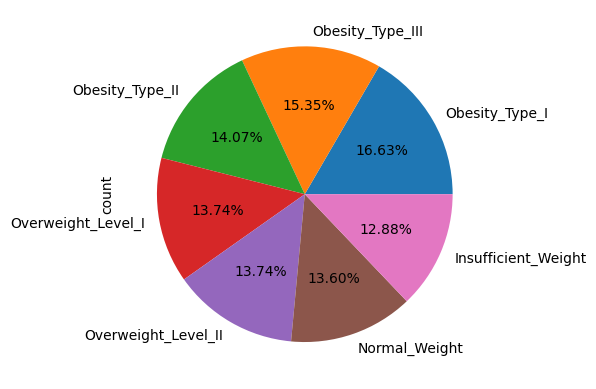

In [2]:
import matplotlib.pyplot as plt

data = df['NObeyesdad'].value_counts()
data.plot(kind='pie',autopct='%.2f%%')
plt.show()

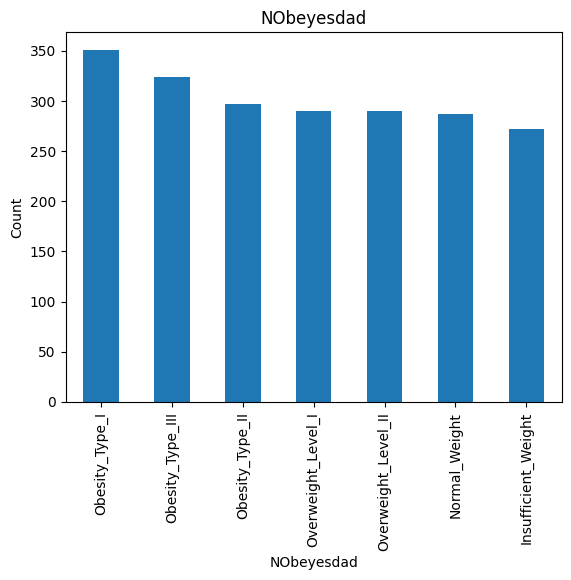

In [3]:
df_obesity = df['NObeyesdad'].value_counts()
df_obesity.plot(kind='bar')
plt.title('NObeyesdad')
plt.ylabel('Count')
plt.show()

# Check Histogram

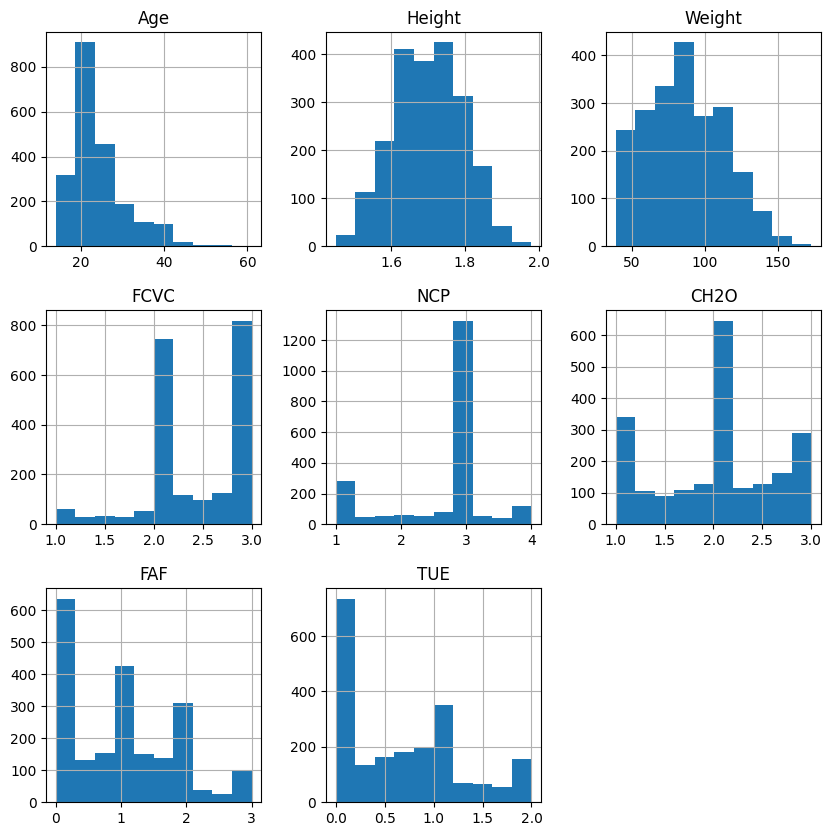

In [4]:
df.hist(figsize=(10,10))
plt.show()

# Check Correlation Between Variable

In [5]:
df.corr(numeric_only = True)

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
Age,1.000000,-0.025958,0.202560,0.016291,-0.043944,-0.045304,-0.144938,-0.296931
Height,-0.025958,1.000000,0.463136,-0.038121,0.243672,0.213376,0.294709,0.051912
Weight,0.202560,0.463136,1.000000,0.216125,0.107469,0.200575,-0.051436,-0.071561
FCVC,0.016291,-0.038121,0.216125,1.000000,0.042216,0.068461,0.019939,-0.101135
NCP,-0.043944,0.243672,0.107469,0.042216,1.000000,0.057088,0.129504,0.036326
CH2O,-0.045304,0.213376,0.200575,0.068461,0.057088,1.000000,0.167236,0.011965
FAF,-0.144938,0.294709,-0.051436,0.019939,0.129504,0.167236,1.000000,0.058562
TUE,-0.296931,0.051912,-0.071561,-0.101135,0.036326,0.011965,0.058562,1.000000


# Check Descriptive Statistic

In [6]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


#check missing values

In [7]:
df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

#Check Duplicated

In [8]:
df.duplicated().sum()

24

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2087 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2087 non-null   object 
 1   Age                             2087 non-null   float64
 2   Height                          2087 non-null   float64
 3   Weight                          2087 non-null   float64
 4   family_history_with_overweight  2087 non-null   object 
 5   FAVC                            2087 non-null   object 
 6   FCVC                            2087 non-null   float64
 7   NCP                             2087 non-null   float64
 8   CAEC                            2087 non-null   object 
 9   SMOKE                           2087 non-null   object 
 10  CH2O                            2087 non-null   float64
 11  SCC                             2087 non-null   object 
 12  FAF                             2087 no

#Check Categorical Attributes

In [11]:
df_X = df.drop(['NObeyesdad'],axis=1)
df_y = df[['NObeyesdad']]

cats = df_X.select_dtypes(include=['object', 'bool']).columns
print(cats)

Index(['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
       'SCC', 'CALC', 'MTRANS'],
      dtype='object')


#Data Preprocessing

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from imblearn.metrics import sensitivity_specificity_support
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

le = LabelEncoder()

cats = df_X.select_dtypes(include=['object', 'bool']).columns
cat_features = list(cats.values)
for i in cat_features:
  df_X[i] = le.fit_transform(df_X[i])

df_y = le.fit_transform(df_y['NObeyesdad'])

X = df_X.astype(float).values
y = df_y.astype(float)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=52)

scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
le.classes_

array(['Insufficient_Weight', 'Normal_Weight', 'Obesity_Type_I',
       'Obesity_Type_II', 'Obesity_Type_III', 'Overweight_Level_I',
       'Overweight_Level_II'], dtype=object)

#Logistic Regression

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy  0.8827751196172249
Precision  0.8737447232108086
Recall  0.8752226945963834
Confusion matrix  [[57  0  0  0  0  0  0]
 [ 9 45  0  0  0  8  3]
 [ 0  0 67  1  0  0  3]
 [ 0  0  0 59  0  0  0]
 [ 0  0  0  0 67  0  0]
 [ 0  3  0  0  0 41  8]
 [ 0  0  3  3  0  8 33]]
F1  0.8707540582175899


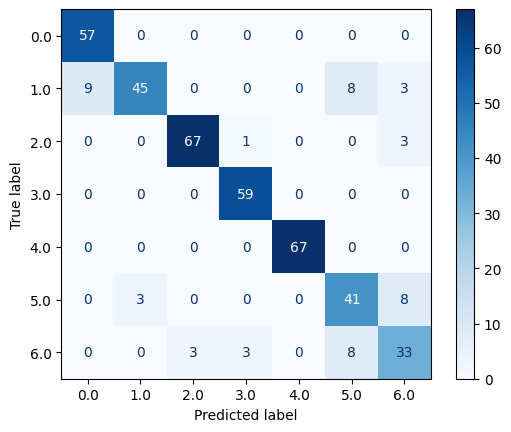

In [14]:
import numpy as np

model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

y_pred_LR = model_lr.predict(X_test)

print('Accuracy ',accuracy_score(y_test, y_pred_LR))
print('Precision ',precision_score(y_test, y_pred_LR, average='macro'))
print('Recall ',recall_score(y_test, y_pred_LR, average='macro'))
print('Confusion matrix ', confusion_matrix(y_test, y_pred_LR))

cm = confusion_matrix(y_test, y_pred_LR)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
# plt.show()
disp.plot(cmap=plt.cm.Blues)
from sklearn.metrics import f1_score
print('F1 ',f1_score(y_test, y_pred_LR, average='macro'))

#KNN

Accuracy  0.7966507177033493
Precision  0.7918095569888682
Recall  0.7898442059883513
Confusion matrix  [[53  3  0  0  0  1  0]
 [17 26  3  2  1  7  9]
 [ 0  1 65  3  1  0  1]
 [ 0  0  1 58  0  0  0]
 [ 0  0  0  1 66  0  0]
 [ 3  2 10  2  0 33  2]
 [ 1  1  5  5  0  3 32]]


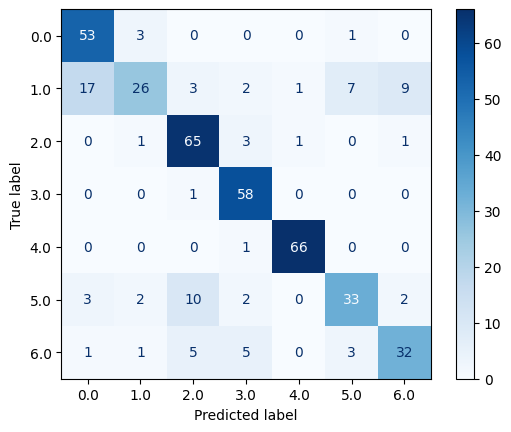

In [15]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier(n_neighbors=10)
model_knn.fit(X_train, y_train)

y_pred = model_knn.predict(X_test)

print('Accuracy ',accuracy_score(y_test, y_pred))
print('Precision ',precision_score(y_test, y_pred, average='macro'))
print('Recall ',recall_score(y_test, y_pred, average='macro'))
print('Confusion matrix ', confusion_matrix(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap=plt.cm.Blues)

#Decision Tree

Accuracy  0.9473684210526315
Precision  0.9446271182873277
Recall  0.9461880283836518
Confusion matrix  [[57  0  0  0  0  0  0]
 [ 5 59  0  0  0  1  0]
 [ 0  0 67  0  0  0  4]
 [ 0  0  2 57  0  0  0]
 [ 0  0  0  1 66  0  0]
 [ 0  3  0  0  0 46  3]
 [ 0  0  1  0  0  2 44]]


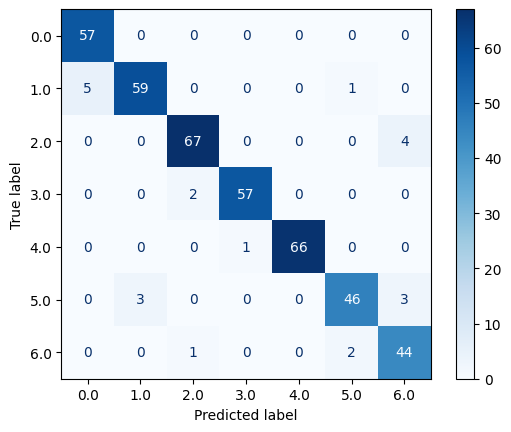

In [16]:
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier(criterion="entropy")
model_dt.fit(X_train, y_train)

y_pred = model_dt.predict(X_test)

print('Accuracy ',accuracy_score(y_test, y_pred))
print('Precision ',precision_score(y_test, y_pred, average='macro'))
print('Recall ',recall_score(y_test, y_pred, average='macro'))
print('Confusion matrix ', confusion_matrix(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap=plt.cm.Blues)

#SVM

Accuracy: 0.8875598086124402
Precision: 0.8852200542886027
Recall: 0.8807678828298868
Confusion matrix: [[54  3  0  0  0  0  0]
 [ 4 49  0  0  0 10  2]
 [ 0  2 67  0  0  0  2]
 [ 0  0  1 58  0  0  0]
 [ 0  1  0  0 66  0  0]
 [ 0  7  1  0  0 42  2]
 [ 0  5  2  0  0  5 35]]


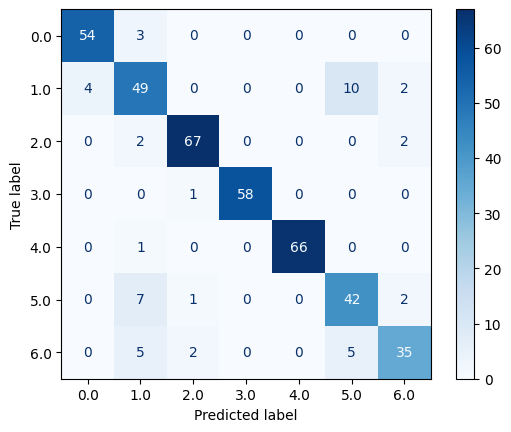

In [17]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

svm_model = SVC(kernel='rbf', random_state=42)

svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred_svm))
print('Precision:', precision_score(y_test, y_pred_svm, average='macro'))
print('Recall:', recall_score(y_test, y_pred_svm, average='macro'))
print('Confusion matrix:', confusion_matrix(y_test, y_pred_svm))

cm_svm = confusion_matrix(y_test, y_pred_svm)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=np.unique(y_test))
disp_svm.plot(cmap=plt.cm.Blues)

#GBM (Gradient Boost Machine)

Accuracy: 0.9617224880382775
Precision: 0.9591010590163133
Recall: 0.9616215493490581
Confusion matrix: [[56  1  0  0  0  0  0]
 [ 0 57  0  0  0  8  0]
 [ 0  0 71  0  0  0  0]
 [ 0  0  1 58  0  0  0]
 [ 0  0  0  1 66  0  0]
 [ 0  2  0  0  0 47  3]
 [ 0  0  0  0  0  0 47]]


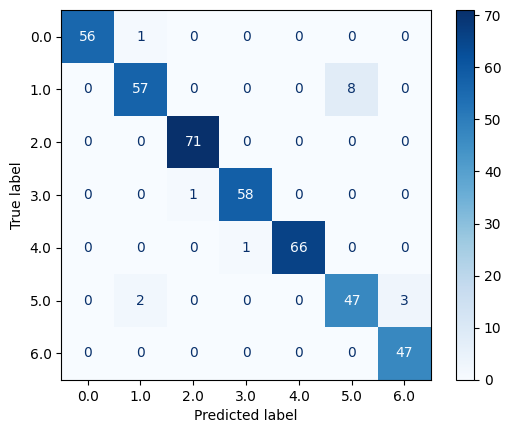

In [18]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

gbm_model = GradientBoostingClassifier(random_state=42)

gbm_model.fit(X_train, y_train)

y_pred_gbm = gbm_model.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred_gbm))
print('Precision:', precision_score(y_test, y_pred_gbm, average='macro'))
print('Recall:', recall_score(y_test, y_pred_gbm, average='macro'))
print('Confusion matrix:', confusion_matrix(y_test, y_pred_gbm))

cm_gbm = confusion_matrix(y_test, y_pred_gbm)
disp_gbm = ConfusionMatrixDisplay(confusion_matrix=cm_gbm, display_labels=np.unique(y_test))
disp_gbm.plot(cmap=plt.cm.Blues)

#GBDT

Accuracy: 0.9617224880382775
Precision: 0.9591010590163133
Recall: 0.9616215493490581
Confusion matrix: [[56  1  0  0  0  0  0]
 [ 0 57  0  0  0  8  0]
 [ 0  0 71  0  0  0  0]
 [ 0  0  1 58  0  0  0]
 [ 0  0  0  1 66  0  0]
 [ 0  2  0  0  0 47  3]
 [ 0  0  0  0  0  0 47]]


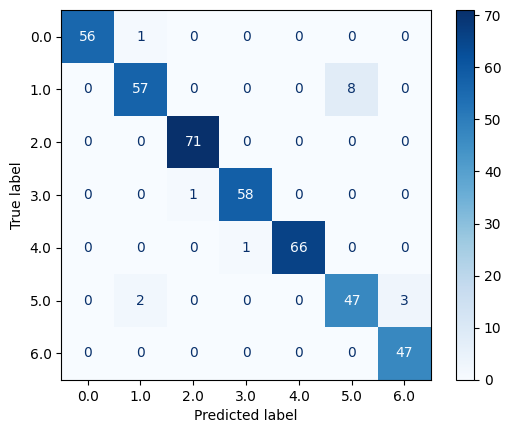

In [19]:
from sklearn.ensemble import GradientBoostingClassifier

gbdt_model = GradientBoostingClassifier(random_state=42)

gbdt_model.fit(X_train, y_train)

y_pred_gbdt = gbdt_model.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred_gbdt))
print('Precision:', precision_score(y_test, y_pred_gbdt, average='macro'))
print('Recall:', recall_score(y_test, y_pred_gbdt, average='macro'))
print('Confusion matrix:', confusion_matrix(y_test, y_pred_gbdt))

cm_gbdt = confusion_matrix(y_test, y_pred_gbdt)
disp_gbdt = ConfusionMatrixDisplay(confusion_matrix=cm_gbdt, display_labels=np.unique(y_test))
disp_gbdt.plot(cmap=plt.cm.Blues)


#Random Forest

Accuracy  0.9545454545454546
Precision  0.9528648783457045
Recall  0.9517490154914546
Confusion matrix  [[54  3  0  0  0  0  0]
 [ 2 60  0  0  0  2  1]
 [ 0  0 70  0  0  0  1]
 [ 0  0  1 58  0  0  0]
 [ 0  0  0  0 67  0  0]
 [ 0  4  0  0  0 45  3]
 [ 0  1  0  0  0  1 45]]


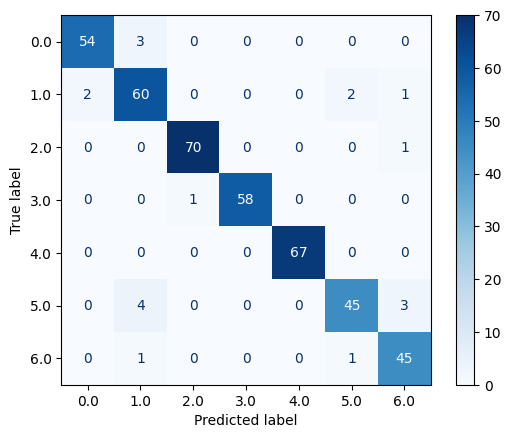

In [20]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

y_pred_RF = model_rf.predict(X_test)

print('Accuracy ',accuracy_score(y_test, y_pred_RF))
print('Precision ',precision_score(y_test, y_pred_RF, average='macro'))
print('Recall ',recall_score(y_test, y_pred_RF, average='macro'))
print('Confusion matrix ', confusion_matrix(y_test, y_pred_RF))
cm = confusion_matrix(y_test, y_pred_RF)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap=plt.cm.Blues)

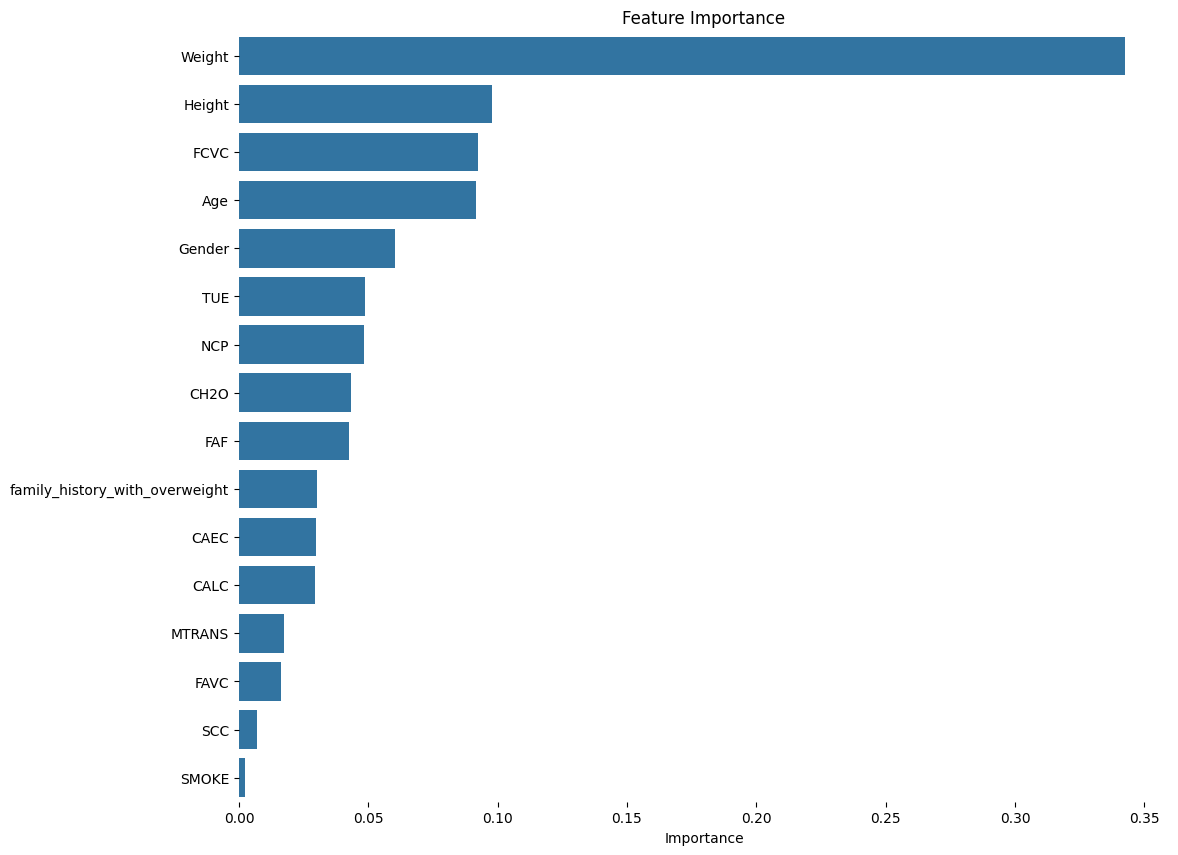

In [21]:
import seaborn as sns

feature_importance = model_rf.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': df_X.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(12, 10))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('')
sns.despine(left=True, bottom=True)
plt.show()

#LGBM

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000902 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2069
[LightGBM] [Info] Number of data points in the train set: 1669, number of used features: 16
[LightGBM] [Info] Start training from score -2.072872
[LightGBM] [Info] Start training from score -2.040083
[LightGBM] [Info] Start training from score -1.785190
[LightGBM] [Info] Start training from score -1.947709
[LightGBM] [Info] Start training from score -1.870904
[LightGBM] [Info] Start training from score -2.008334
[LightGBM] [Info] Start training from score -1.926918
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with p

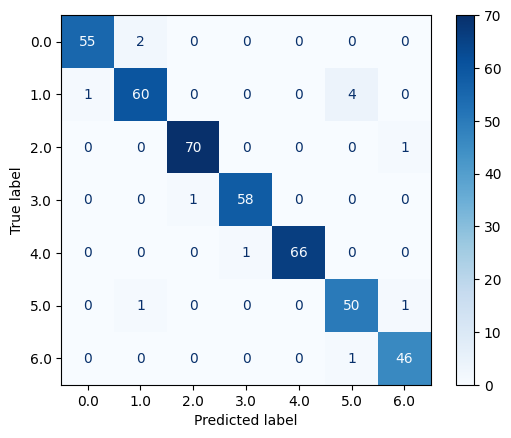

In [22]:
import numpy as np
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay, f1_score

model_lgbm = LGBMClassifier()
model_lgbm.fit(X_train, y_train)

y_pred_LGBM = model_lgbm.predict(X_test)

print('Accuracy ', accuracy_score(y_test, y_pred_LGBM))
print('Precision ', precision_score(y_test, y_pred_LGBM, average='macro'))
print('Recall ', recall_score(y_test, y_pred_LGBM, average='macro'))
print('Confusion matrix ', confusion_matrix(y_test, y_pred_LGBM))

cm = confusion_matrix(y_test, y_pred_LGBM)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap=plt.cm.Blues)

print('F1 ', f1_score(y_test, y_pred_LGBM, average='macro'))

In [23]:
import lightgbm as lgb
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

pipeline = Pipeline(steps=[('preprocessor', numeric_transformer),
                           ('classifier', lgb.LGBMClassifier())])

pipeline.fit(X_train, y_train)

y_pred_lgbm = pipeline.predict(X_test)

print('Accuracy: ', accuracy_score(y_test, y_pred_lgbm))
print('Precision: ', precision_score(y_test, y_pred_lgbm, average='macro'))
print('Recall: ', recall_score(y_test, y_pred_lgbm, average='macro'))
print('Confusion matrix: ', confusion_matrix(y_test, y_pred_lgbm))
print('F1: ', f1_score(y_test, y_pred_lgbm, average='macro'))

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000343 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2069
[LightGBM] [Info] Number of data points in the train set: 1669, number of used features: 16
[LightGBM] [Info] Start training from score -2.072872
[LightGBM] [Info] Start training from score -2.040083
[LightGBM] [Info] Start training from score -1.785190
[LightGBM] [Info] Start training from score -1.947709
[LightGBM] [Info] Start training from score -1.870904
[LightGBM] [Info] Start training from score -2.008334
[LightGBM] [Info] Start training from score -1.926918
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with p

#Test Overfitting / Underfitting

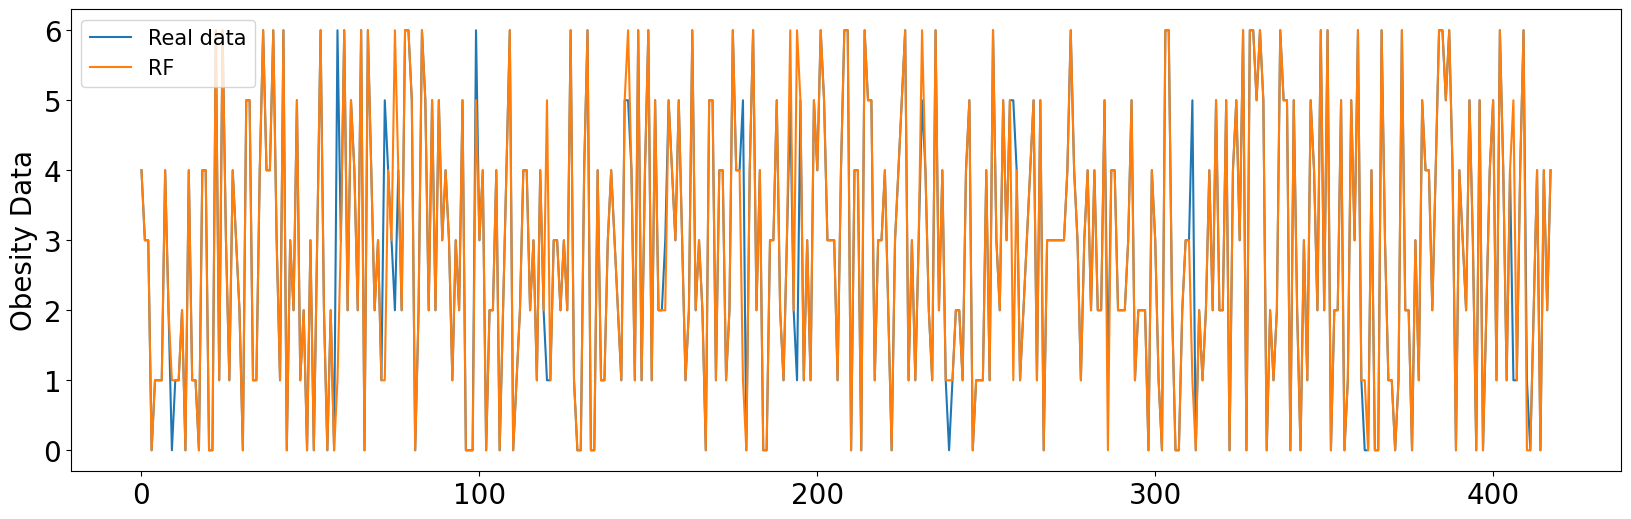

In [24]:
fig1 = plt.figure(figsize=(20,6))

#plotting the result
plt.plot(y_test, label='Real data')
plt.plot(y_pred_RF, label='RF')

#title
#pyplot.title('First 100 Test Data')
#the x axis is timestamp, with interval 1 day
# plt.xlabel('Time t', fontsize=20)

#because we use total rented bikes, so that the y axis is rented bikes
plt.ylabel('Obesity Data', fontsize=20)
plt.legend(loc='upper left', fontsize=15)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In [25]:
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.model_selection import learning_curve, validation_curve
# from sklearn.ensemble import RandomForestClassifier

# def plot_learning_curve(train_sizes, train_scores, test_scores):
#     plt.figure()
#     plt.title("Learning Curve (RF)")
#     plt.xlabel("Training examples")
#     plt.ylabel("Score")

#     train_scores_mean = np.mean(train_scores, axis=1)
#     train_scores_std = np.std(train_scores, axis=1)
#     test_scores_mean = np.mean(test_scores, axis=1)
#     test_scores_std = np.std(test_scores, axis=1)

#     plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
#     plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
#                      train_scores_mean + train_scores_std, alpha=0.1, color="r")
#     plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
#     plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
#                      test_scores_mean + test_scores_std, alpha=0.1, color="g")

#     plt.legend(loc="best")
#     plt.show()

# def plot_validation_curve(param_range, train_scores, test_scores, param_name):
#     plt.figure()
#     plt.title("Validation Curve (RF)")
#     plt.xlabel(param_name)
#     plt.ylabel("Score")

#     train_scores_mean = np.mean(train_scores, axis=1)
#     train_scores_std = np.std(train_scores, axis=1)
#     test_scores_mean = np.mean(test_scores, axis=1)
#     test_scores_std = np.std(test_scores, axis=1)

#     plt.plot(param_range, train_scores_mean, 'o-', color="r", label="Training score")
#     plt.fill_between(param_range, train_scores_mean - train_scores_std,
#                      train_scores_mean + train_scores_std, alpha=0.1, color="r")
#     plt.plot(param_range, test_scores_mean, 'o-', color="g", label="Cross-validation score")
#     plt.fill_between(param_range, test_scores_mean - test_scores_std,
#                      test_scores_mean + test_scores_std, alpha=0.1, color="g")

#     plt.legend(loc="best")
#     plt.show()

# def evaluate_model(X_train, y_train, estimator, param_range=None, param_name=None):
#     train_sizes, train_scores, test_scores = learning_curve(estimator, X_train, y_train, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))
#     plot_learning_curve(train_sizes, train_scores, test_scores)

#     if param_range is not None and param_name is not None:
#         train_scores, test_scores = validation_curve(estimator, X_train, y_train, param_name=param_name, param_range=param_range, cv=5, n_jobs=-1)
#         plot_validation_curve(param_range, train_scores, test_scores, param_name)

# estimator = RandomForestClassifier()
# param_range = np.arange(10, 200, 10)
# param_name = "n_estimators"

# evaluate_model(X_train, y_train, estimator, param_range=param_range, param_name=param_name)

#GUI and Kaggle Competition

In [26]:
# Prepare test data
# test_data = pd.read_csv('/content/drive/MyDrive/UGM/Semester 6/Praktikum Penambangan Data/Projek UTS & UAS/test.csv')
# test_data.head()

In [27]:
# le2 = LabelEncoder()

# cats = test_data.select_dtypes(include=['object', 'bool']).columns
# cat_features = list(cats.values)
# for i in cat_features:
#   test_data[i] = le2.fit_transform(test_data[i])

In [28]:
# test_predictions = model_lgbm.predict(test_data)

In [29]:
# le.classes_

In [30]:
# submission_df = pd.DataFrame({'id': test_data['id'],
#                               'NObeyesdad': le.inverse_transform(test_predictions.astype(int))})

# submission_df.to_csv('submission.csv', index=False)

#Testing

In [31]:
df.NObeyesdad.value_counts()

NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_II    290
Normal_Weight          282
Overweight_Level_I     276
Insufficient_Weight    267
Name: count, dtype: int64

In [32]:
df_X.CAEC.value_counts()

CAEC
2    1761
1     236
0      53
3      37
Name: count, dtype: int64

In [33]:
input_features = {
    'Gender' : 1,
    'age': 11,  # Umur (float) ✅
    'height': 162, # Tinggi (float) ✅
    'weight': 64,  # Berat (float) ✅
    'family_history_with_overweight': 1,  # Riwayat keluarga dengan kelebihan berat badan (no = 0 / yes = 1) ✅
    'FAVC': 0,  # Frequent consumption of high caloric food (no = 0 / yes = 1) ✅
    'FCVC': 2.0,  # Frequency of consumption of vegetables (float) ✅
    'NCP': 3.0,  # Number of main meals (float) ✅
    'CAEC': 2,  # Consumption of food between meals (Sometimes : 2, Frequently : 1, Always : 0, no : 3) ✅
    'SMOKE': 0,  # Smoking habit (no = 0 / yes = 1) ✅
    'CH2O': 2,  # Consumption of water daily (float) ✅
    'SCC': 0,  # Caloric food consumption (no = 0 / yes = 1) ✅
    'FAF': 0,  # Physical activity frequency (float) ✅
    'TUE': 1,  # Time using technology devices (float) ✅
    'CALC': 3,  # Consumption of alcohol (Sometimes : 2, Frequently : 1, Always : 0, no : 3)
    'MTRANS' : 3 # Transportation used (Public Transportation : 3, Automobile : 0, Walking : 4, Motorbike : 2, Bike : 1)
}

# input_features_encoded = {
#     'Age': input_features['Age'],
#     'Height': input_features['Height'],
#     'Weight': input_features['Weight'],
#     'family_history_with_overweight_yes': 1 if input_features['family_history_with_overweight'] == 'yes' else 0,
#     'family_history_with_overweight_no': 1 if input_features['family_history_with_overweight'] == 'no' else 0,
#     'FAVC_yes': 1 if input_features['FAVC'] == 'yes' else 0,
#     'FAVC_no': 1 if input_features['FAVC'] == 'no' else 0,
#     'CAEC_Always': 1 if input_features['CAEC'] == 'Always' else 0,
#     'CAEC_Frequently': 1 if input_features['CAEC'] == 'Frequently' else 0,
#     'CAEC_Sometimes': 1 if input_features['CAEC'] == 'Sometimes' else 0,
#     'CAEC_no': 1 if input_features['CAEC'] == 'no' else 0,
#     'SMOKE_yes': 1 if input_features['SMOKE'] == 'yes' else 0,
#     'SMOKE_no': 1 if input_features['SMOKE'] == 'no' else 0,
#     'SCC_yes': 1 if input_features['SCC'] == 'yes' else 0,
#     'SCC_no': 1 if input_features['SCC'] == 'no' else 0,
#     'CALC_Always': 1 if input_features['CALC'] == 'Always' else 0,
#     'CALC_Frequently': 1 if input_features['CALC'] == 'Frequently' else 0,
#     'CALC_Sometimes': 1 if input_features['CALC'] == 'Sometimes' else 0,
#     'CALC_no': 1 if input_features['CALC'] == 'no' else 0
# }

predicted_label = model_lgbm.predict([list(input_features.values())])
result = predicted_label[0]

if (result == 0):
  print('Predicted Label: Insufficient_Weight')
elif(result == 1):
    print('Predicted Label: Normal_Weight')
elif(result == 2):
    print('Predicted Label: Overweight_Level_I')
elif(result == 3):
    print('Predicted Label: Overweight_Level_II')
elif(result == 4):
    print('Predicted Label: Obesity_Type_I')
elif(result == 5):
    print('Predicted Label: Obesity_Type_II')
elif(result == 6):
    print('Predicted Label: Obesity_Type_III')

print(result)
print(predicted_label)

Predicted Label: Obesity_Type_I
4.0
[4.]


#Test Deploy

In [34]:
# import joblib

# joblib.dump(model_lgbm, 'lgbm_model-0.2.0.pkl')

# import pickle

# with open('lgbm_model-0.4.0.pkl','wb') as f:
#     pickle.dump(pipeline, f)